In [941]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import Normalizer, PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


Question 1: Data Cleaning

In [942]:
""" 1.1) Read the data file into a Pandas data frame. Inspect Data"""

cwd = os.getcwd()
print("Current Working Directory:", cwd)

df = pd.read_csv("AutoMpg.csv")

df.head(20)

Current Working Directory: c:\Users\35385\Desktop\CS_Autumn2024\DataMining\Tom_Gibson-p3


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8,307.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,165.0,15.0,8,350.0,3693,11.5,70,1.0,buick skylark 320
2,150.0,18.0,8,318.0,3436,11.0,70,1.0,plymouth satellite
3,150.0,16.0,8,304.0,3433,12.0,70,1.0,amc rebel sst
4,140.0,17.0,8,302.0,3449,10.5,70,1.0,ford torino
5,198.0,15.0,8,429.0,4341,10.0,70,1.0,ford galaxie 500
6,220.0,14.0,8,454.0,4354,9.0,70,1.0,chevrolet impala
7,215.0,14.0,8,440.0,4312,8.5,70,1.0,plymouth fury iii
8,225.0,14.0,8,455.0,4425,10.0,70,1.0,pontiac catalina
9,190.0,15.0,8,390.0,3850,8.5,70,NaN,amc ambassador dpl


In [943]:
df.tail(10)

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
392,112.0,22.0,6,232.0,2835,14.7,82,1.0,ford granada l
393,96.0,32.0,4,144.0,2665,13.9,82,3.0,toyota celica gt
394,84.0,36.0,4,135.0,2370,13.0,82,1.0,dodge charger 2.2
395,90.0,27.0,4,151.0,2950,17.3,82,1.0,chevrolet camaro
396,86.0,27.0,4,140.0,2790,15.6,82,1.0,ford mustang gl
397,52.0,44.0,4,97.0,2130,24.6,82,2.0,vw pickup
398,84.0,32.0,4,135.0,2295,11.6,82,1.0,dodge rampage
399,79.0,28.0,4,120.0,2625,18.6,82,1.0,ford ranger
400,82.0,31.0,4,119.0,2720,19.4,82,1.0,chevy s-10
401,160.0,14.0,8,340.0,3609,8.0,70,1.0,plymouth 'cuda 340


In [944]:
df.shape

(402, 9)

In [945]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   horsepower    386 non-null    float64
 1   mpg           402 non-null    float64
 2   cylinders     402 non-null    int64  
 3   displacement  402 non-null    float64
 4   weight        402 non-null    int64  
 5   acceleration  402 non-null    float64
 6   model year    402 non-null    int64  
 7   origin        387 non-null    float64
 8   car name      402 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.4+ KB


In [946]:
""" 1.2) Remove duplicate rows while keeping the first record/row"""

df = df.drop_duplicates(keep = "first")


In [947]:
""" 1.3) Calculate the missing values in the dataset"""

df2 = df
initial_row_count = df2.shape[0]
df2 = df2.dropna()
final_row_count = df2.shape[0]
missing_values = initial_row_count - final_row_count
print(f"Number of rows with missing values: {missing_values}")

Number of rows with missing values: 30


In [948]:
"""1.4) Convert any ("NaN", and "nan") representations of missing values to the proper “NaN” 
type that pandas recognise as missing values."""

df.replace(["NaN", "nan", ""], pd.NA, inplace=True)

print(df.isnull().sum())

horsepower      16
mpg              0
cylinders        0
displacement     0
weight           0
acceleration     0
model year       0
origin          15
car name         0
dtype: int64


If a row has more than one missing value, it will only be counted once because the entire row is removed - this explains the discrepency between 30 rows with missing values and the subsequent 31 (16 + 15) values present.

In [949]:
rows_with_multiple_missing = df[df.isnull().sum(axis=1) > 1]

print(rows_with_multiple_missing)

    horsepower   mpg  cylinders  displacement  weight  acceleration  \
96         NaN  13.0          8         440.0    4735          11.0   

    model year  origin                      car name  
96          73     NaN  chrysler new yorker brougham  


In [950]:
"""1.5) Use the given code to fill the missing values of “horsepower” column using KNN Imputer"""

# Create copy of the required columns
dfq2 = df[['acceleration', 'weight', 'displacement', 'mpg', 'horsepower']].copy()

# Normalise selected columns except 'horsepower'
dfq2[['acceleration', 'weight', 'displacement', 'mpg']] = Normalizer().fit_transform(
    dfq2[['acceleration', 'weight', 'displacement', 'mpg']]
)

imputer = KNNImputer(n_neighbors=5, add_indicator=False) # Initialise and fit the KNN Imputer
imputer.fit(dfq2)

# Transform data and create a new DataFrame with imputed values
f = pd.DataFrame(imputer.transform(dfq2), columns=dfq2.columns)
f = f.rename(columns={"horsepower": "horsepower_imputed"})

# Merge imputed 'horsepower' column back into original DataFrame
df = pd.merge(f[['horsepower_imputed']], df, left_index=True, right_index=True, how='outer')

df = df.drop('horsepower', axis=1)
df= df.rename(columns={"horsepower_imputed": "horsepower"})

In [951]:
"""1.6) Fill the missing “origin” values with the mode of “origin” column."""

origin_mode = df["origin"].mode()[0]
df["origin"].fillna(origin_mode, inplace=True)
df

C:\Users\35385\AppData\Local\Temp\ipykernel_25788\3467064356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["origin"].fillna(origin_mode, inplace=True)


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8.0,307.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,165.0,15.0,8.0,350.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,150.0,18.0,8.0,318.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,150.0,16.0,8.0,304.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,140.0,17.0,8.0,302.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
396,79.0,27.0,4.0,140.0,2790.0,15.6,82.0,1.0,ford mustang gl
397,82.0,44.0,4.0,97.0,2130.0,24.6,82.0,2.0,vw pickup
398,NaN,32.0,4.0,135.0,2295.0,11.6,82.0,1.0,dodge rampage
399,NaN,28.0,4.0,120.0,2625.0,18.6,82.0,1.0,ford ranger


In [952]:
"""1.7) Set the “cylinders” values 3 and 5 as “nan” and then fill those missing values using KNNImputer 
(as shown in the above given code). (NOTE: set n_neighbors = 1, and the columns are acceleration, 
weight, displacement, mpg, and horsepower)."""

# Replace 'cylinders' values 3 and 5 with NaN
df['cylinders'].replace([3, 5], np.nan, inplace=True)

# Create a subset DataFrame with relevant columns
dfq2 = df[['acceleration', 'weight', 'displacement', 'mpg', 'horsepower', 'cylinders']].copy()

# Apply KNN imputation with n_neighbors=1 to fill missing values
imputer = KNNImputer(n_neighbors=1)
dfq2_imputed = pd.DataFrame(imputer.fit_transform(dfq2), columns=dfq2.columns)

# Assign imputed values back to the original DataFrame
df['acceleration'] = dfq2_imputed['acceleration']
df['weight'] = dfq2_imputed['weight']
df['displacement'] = dfq2_imputed['displacement']
df['mpg'] = dfq2_imputed['mpg']
df['horsepower'] = dfq2_imputed['horsepower']
df['cylinders'] = dfq2_imputed['cylinders']

df

C:\Users\35385\AppData\Local\Temp\ipykernel_25788\391800458.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].replace([3, 5], np.nan, inplace=True)


,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8.0,307.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,165.0,15.0,8.0,350.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,150.0,18.0,8.0,318.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,150.0,16.0,8.0,304.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,140.0,17.0,8.0,302.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
396,79.0,27.0,4.0,140.0,2790.0,15.6,82.0,1.0,ford mustang gl
397,82.0,44.0,4.0,97.0,2130.0,24.6,82.0,2.0,vw pickup
398,101.0,32.0,4.0,135.0,2295.0,11.6,82.0,1.0,dodge rampage
399,116.0,28.0,4.0,120.0,2625.0,18.6,82.0,1.0,ford ranger


In [953]:
"""1.8) Identify outliers in “mpg” using Inter Quartile Range (IQR) approach and impute them with 
lower band and upper band values appropriately (any outlier above the upper band replace it with 
the value of upper band, and any outlier below the lower band replace it with the value of lower band). """

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for mpg
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and replace them with the lower or upper bounds
df['mpg'] = df['mpg'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

print(df['mpg'])


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
396    27.0
397    44.0
398    32.0
399    28.0
400    31.0
Name: mpg, Length: 401, dtype: float64


In [954]:
df

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,130.0,18.0,8.0,307.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,165.0,15.0,8.0,350.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,150.0,18.0,8.0,318.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,150.0,16.0,8.0,304.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,140.0,17.0,8.0,302.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
396,79.0,27.0,4.0,140.0,2790.0,15.6,82.0,1.0,ford mustang gl
397,82.0,44.0,4.0,97.0,2130.0,24.6,82.0,2.0,vw pickup
398,101.0,32.0,4.0,135.0,2295.0,11.6,82.0,1.0,dodge rampage
399,116.0,28.0,4.0,120.0,2625.0,18.6,82.0,1.0,ford ranger


In [955]:
"""1.9) Replace the values of column “origin” with the country of origin as follows: 1: 'USA', 2: 'Europe', 3: 'Japan'."""

# Replace values in 'origin' column with country names
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})

# Display the updated DataFrame
print(df[['origin']])


     origin
0       USA
1       USA
2       USA
3       USA
4       USA
..      ...
396     USA
397  Europe
398     USA
399     USA
400     USA

[401 rows x 1 columns]


In [956]:
"""1.10) Convert the “model year” column values into DateTime format (70 should be 1970). """
# Datetime format inherently includes the full date (year, month, day).

# Convert "model year" to a DateTime format with January 1 as the default month and day
df['model year'] = pd.to_datetime(1900 + df['model year'], format='%Y') + pd.DateOffset(months=0, days=0)

# Display the updated "model year" column
print(df[['model year']])


    model year
0   1970-01-01
1   1970-01-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
..         ...
396 1982-01-01
397 1982-01-01
398 1982-01-01
399 1982-01-01
400 1982-01-01

[401 rows x 1 columns]


In [957]:
"""1.11) Use the given code to create a new column “brand”, and extract the car brand from the first word of the “car name” column """

# Dictionary of misspelled brand names and their corrections
miss = {
    'chevroelt': 'chevrolet', 
    'chevy': 'chevrolet', 
    'vokswagen': 'volkswagen', 
    'vw': 'volkswagen', 
    'hi': 'harvester', 
    'maxda': 'mazda',
    'toyouta': 'toyota', 
    'mercedes-benz': 'mercedes'
}

# Ensure 'car name' column values are strings and handle any missing values
df['car name'] = df['car name'].fillna('').astype(str)

# Extract the brand and apply corrections using the miss dictionary
df['brand'] = [
    miss.get(str(key).lower(), key).title() if isinstance(key, str) else ''
    for key in df['car name'].str.split().str[0]
]

# Manually correct specific brand names
df.loc[df['brand'] == 'Capri', 'brand'] = 'Ford'
df.loc[df['brand'] == 'Datsun', 'brand'] = 'Nissan'

# Drop the original "car name" column, as it's no longer needed
df.drop(['car name'], axis=1, inplace=True)

# Display the updated DataFrame
print(df[['brand']])

          brand
0     Chevrolet
1         Buick
2      Plymouth
3           Amc
4          Ford
..          ...
396        Ford
397  Volkswagen
398       Dodge
399        Ford
400   Chevrolet

[401 rows x 1 columns]


Question 2: Polynomial Regression

In [958]:
df

,horsepower,mpg,cylinders,displacement,weight,acceleration,model year,origin,brand
0,130.0,18.0,8.0,307.0,3504.0,12.0,1970-01-01,USA,Chevrolet
1,165.0,15.0,8.0,350.0,3693.0,11.5,1970-01-01,USA,Buick
2,150.0,18.0,8.0,318.0,3436.0,11.0,1970-01-01,USA,Plymouth
3,150.0,16.0,8.0,304.0,3433.0,12.0,1970-01-01,USA,Amc
4,140.0,17.0,8.0,302.0,3449.0,10.5,1970-01-01,USA,Ford
...,...,...,...,...,...,...,...,...,...
396,79.0,27.0,4.0,140.0,2790.0,15.6,1982-01-01,USA,Ford
397,82.0,44.0,4.0,97.0,2130.0,24.6,1982-01-01,Europe,Volkswagen
398,101.0,32.0,4.0,135.0,2295.0,11.6,1982-01-01,USA,Dodge
399,116.0,28.0,4.0,120.0,2625.0,18.6,1982-01-01,USA,Ford


In [959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 400
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   horsepower    401 non-null    float64       
 1   mpg           401 non-null    float64       
 2   cylinders     401 non-null    float64       
 3   displacement  401 non-null    float64       
 4   weight        401 non-null    float64       
 5   acceleration  401 non-null    float64       
 6   model year    398 non-null    datetime64[ns]
 7   origin        401 non-null    object        
 8   brand         401 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 31.3+ KB


In [960]:
"""2.1) Generate a simple linear regression model that predicts “mpg” based on “horsepower”
alone (use sklearn.linear_model library) and train it with 70% of the data. What
are the RMSE and R2 values of testing/predicted data? """

X = df[['horsepower']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(6.772052510270962, 0.2635404114498118)

In [961]:
"""2.2) Generate a group of polynomial models (use sklearn.preprocessing.
PolynomialFeatures) that predict “mpg” based on the “horsepower” alone. The
models should have degrees of 2, 5, 10, and 20. For each model, find RMSE and R2 values
of testing/predicted data """

# Degrees to test
degrees = [2, 5, 10, 20]

# Dictionary to store the results
results = {}

# Iterate over the degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Train a linear regression model on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    
    # Predict and evaluate
    y_poly_pred = poly_model.predict(X_poly_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
    r2 = r2_score(y_test, y_poly_pred)
    
    # Store results
    results[degree] = {'RMSE': rmse, 'R2': r2}
    
results_df = pd.DataFrame(results).T
results_df

,RMSE,R2
2,6.747708,0.268826
5,6.655635,0.288644
10,6.666181,0.286387
20,9.103837,-0.330936


c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


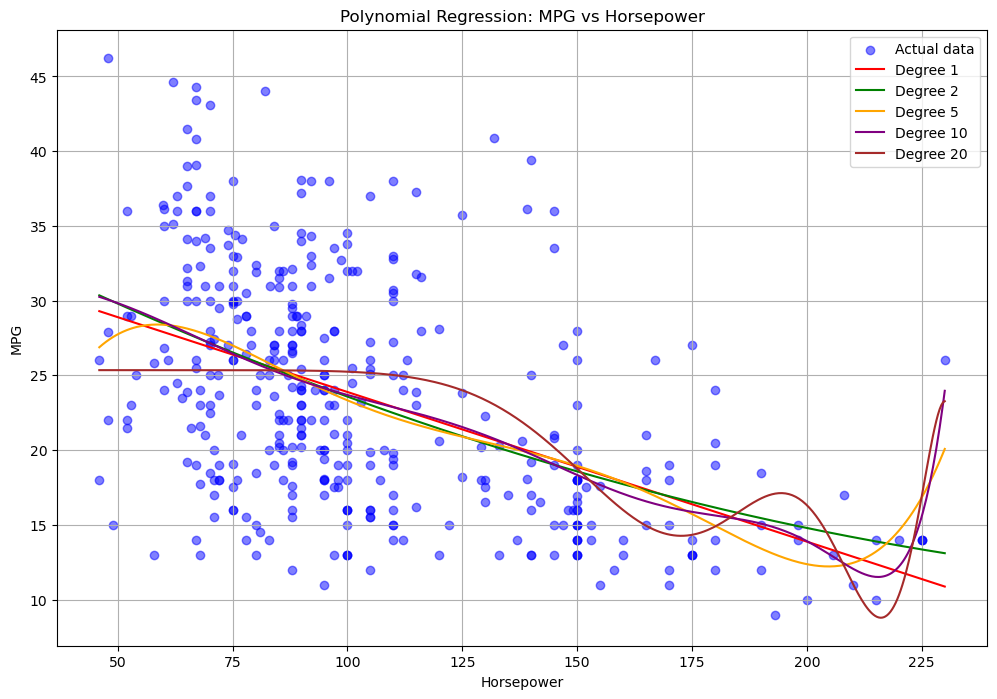

In [962]:
"""2.3) Plot a scatter diagram between “mpg” and “horsepower” with all the fitted linear and
non-linear models. Explain what will happen when the model complexity is increased?
Which model is better? """
    
# Scatter plot of actual data
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual data')

# Polynomial degrees to test
degrees = [1, 2, 5, 10, 20]
colors = ['red', 'green', 'orange', 'purple', 'brown']

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_pred, color=colors[i], label=f'Degree {degree}')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression: MPG vs Horsepower')
plt.legend()
plt.grid()
plt.show()

c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\35385\anaconda3\envs\THISONE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


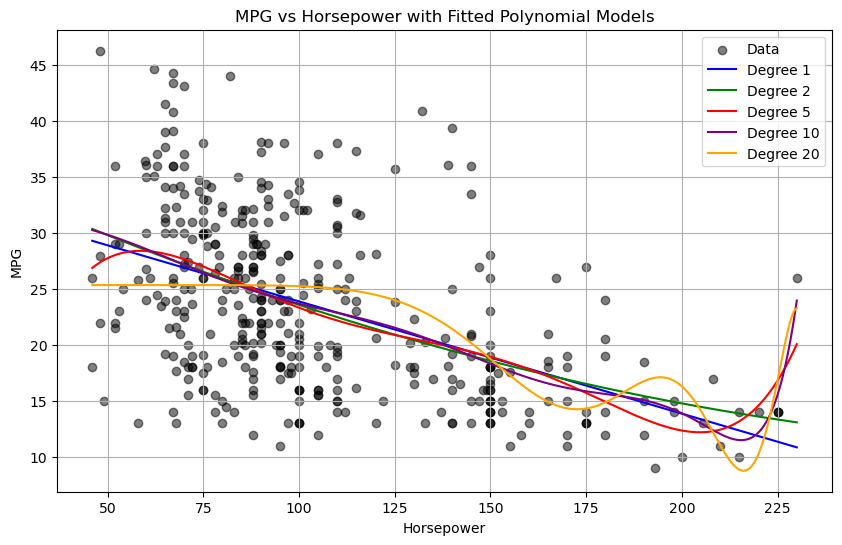

In [963]:
"""2.3) Plot a scatter diagram between “mpg” and “horsepower” with all the fitted linear and
non-linear models. Explain what will happen when the model complexity is increased?
Which model is better? """
    
# Scatter plot of original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', alpha=0.5, label='Data')
    
# Define degrees and colours for plotting
degrees = [1, 2, 5, 10, 20]
colors = ['blue', 'green', 'red', 'purple', 'orange']
    
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_range_pred = model.predict(X_range_poly)
    plt.plot(X_range, y_range_pred, color=colors[i], label=f'Degree {degree}')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower with Fitted Polynomial Models')
plt.legend()
plt.grid()
plt.show()


When model complexity is increased (when higher-degree polynomial models are used), the model becomes more flexible, allowing it to fit the training data more closely. This flexibility can lead a number of effects.

Better Fit on Training Data: Higher-degree polynomials can capture more complex patterns in the data, potentially improving the fit on the training data.

Overfitting: As the model complexity increases, it may start fitting noise or minor fluctuations in the data, rather than capturing the true underlying relationship. This results in overfitting, where the model performs well on training data but poorly on new, unseen data.

Oscillations in Predictions: Higher-degree polynomials can lead to oscillations, especially at the extremes of the range of horsepower values. In this plot, the higher-degree polynomial (degree 20) line diverges and creates oscillations toward the end, which likely does not represent the true relationship between horsepower and mpg.

**Which Model is Better?**
The "better" model depends on the goal. If the goal is predictive performance and generalisation on unseen data, a simpler model (such as degree 1 or 2) may be preferable, as it is less likely to overfit.
If the goal is to capture more complex relationships within this particular dataset, a moderate polynomial degree, such as 5 or 10, might be considered. However, caution is needed to avoid overfitting, as seen with the degree 20 model.
In this case, the degree 1 or degree 2 model might offer a good balance between simplicity and performance, as they avoid the extreme oscillations shown in the higher-degree models.

Question 3: Multiple Linear Regression


In [964]:
"""3.1) Predict “mpg” based on ‘horsepower’, 'displacement', 'weight' and 'acceleration' using
LinearRegration model. What are the RMSE and R2 values? NOTE: Normalize the selected
columns using MinMaxScaler()"""

# Select features and target variable
X = df[['horsepower', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 4.504962035859325
R²: 0.6740953492898787


In [965]:
"""3.2) Predict “mpg” based on the first PCA component of the above four variables
(‘horsepower', 'displacement', 'weight' and 'acceleration') using LinearRegration model.
What are the RMSE and R2 values? NOTE: Normalize the selected columns using
StandardScaler()."""

# Select features and target variable
X = df[['horsepower', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the data to 1 principal component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 4.916051158113679
R²: 0.6119022951767809


In [966]:
"""3.3) Apply OneHotEncoding on “origin” and “cylinders” columns and merge them with the
above four variables from question 3.1 appropriately, predict the “mpg” using
the LinearRegration model, and discuss any accuracy changes."""

# Select the original four features and target variable
X_base = df[['horsepower', 'displacement', 'weight', 'acceleration']]
y = df['mpg']

# One-hot encode 'origin' and 'cylinders' columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
encoded_columns = encoder.fit_transform(df[['origin', 'cylinders']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['origin', 'cylinders']))

# Concatenate the one-hot encoded columns with the base features
X = pd.concat([X_base.reset_index(drop=True), encoded_df], axis=1)

# Normalize the combined features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE and R-squared (R2) values
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 4.592481831416392
R²: 0.6613093708979149


Question 4: Decision Trees 


In [967]:
"""4.1) Create a new column in the data frame from Question 1 (after applying all the cleaning
steps) called "FEGroup" to categorise cars as “1” for “high-fuel” and “0” for “lowfuel” 
consumption. Allocate “0” to 10% of cars having the lowest mpg and “1” to
the remaining 90% of cars. NOTE: use the pandas' qcut function on the mpg column to get
the FEGroup values."""

# Use qcut to categorise cars based on mpg
df['FEGroup'] = pd.qcut(df['mpg'], q=[0, 0.1, 1], labels=[0, 1])

# Convert FEGroup to integer type for clarity
df['FEGroup'] = df['FEGroup'].astype(int)

# Display the updated DataFrame with the new FEGroup column
print(df[['mpg', 'FEGroup']])


      mpg  FEGroup
0    18.0        1
1    15.0        1
2    18.0        1
3    16.0        1
4    17.0        1
..    ...      ...
396  27.0        1
397  44.0        1
398  32.0        1
399  28.0        1
400  31.0        1

[401 rows x 2 columns]


In [ ]:
"""4.2) 2. Discuss and calculate the Baseline accuracy of the class FEGroup. """

# Check the distribution of the target class 'FEGroup'
class_counts = df['FEGroup'].value_counts()
print("Class distribution in FEGroup:\n", class_counts)

# Calculate baseline accuracy as the proportion of the most frequent class
baseline_accuracy = class_counts.max() / class_counts.sum()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Class distribution in FEGroup:
 FEGroup
1    349
0     52
Name: count, dtype: int64
Baseline Accuracy: 0.87


The class distribution in FEGroup shows that there is a significant imbalance between the two classes:

Class 1: 360 instances
Class 0: 41 instances

The baseline accuracy, calculated as the proportion of the most frequent class, is 0.90 (or 90%). This means that if we were to predict every instance as belonging to the majority class (Class 1), we would achieve an accuracy of 90% without using any model. Any model developed for this classification task must achieve an accuracy significantly higher than 90% to be considered effective. An accuracy close to or below 90% would suggest that the model is not performing much better than simply guessing the majority class. As the baseline acccuracy is 87%, simply predicting the majority class is a better solution.

The imbalance in the FEGroup classes (with Class 1 being much more frequent than Class 0) could lead to biased model performance. Many classification models, especially those not tuned for imbalanced data, might end up favouring the majority class, potentially inflating accuracy without correctly identifying instances of the minority class.

Given the imbalance, accuracy alone might not be the best metric for evaluating model performance. Other metrics, such as precision, recall, and the F1-score for each class, or metrics like the Area Under the Receiver Operating Characteristic (ROC AUC), could provide more insight into how well the model performs across both classes. Additioinally, alternatuve techniques for handling imbalanced data (such as oversampling the minority class or using algorithms that are robust to imbalanced classes) could help to ensure that the model is not just biased towards the majority class.

In [969]:
"""4.3) Transform the “origin” column by applying LabelEncoder and use ‘horsepower', 'weight',
'acceleration', ‘cylinders’ and ‘origin’ columns to predict ‘FEGroup’. Split the data into 70%
for training and 30% for testing. Then train KNeighborsClassifier and measure its accuracy."""

# Apply Label Encoding on 'origin' column
label_encoder = LabelEncoder()
df['origin'] = label_encoder.fit_transform(df['origin'])

# Select features and target variable
X = df[['horsepower', 'weight', 'acceleration', 'cylinders', 'origin']]
y = df['FEGroup']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNeighborsClassifier: {accuracy}")


Accuracy of KNeighborsClassifier: 0.9421487603305785


Accuracy of Decision Tree Model: 0.9173553719008265


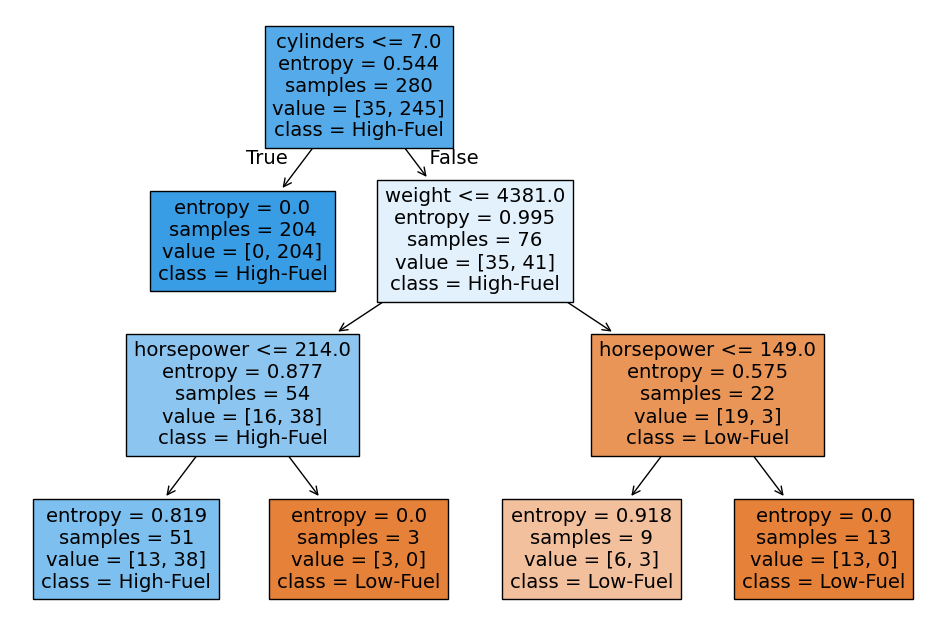

In [ ]:
"""4.4) Generate a decision tree model (using sklearn.tree library) based on horsepower, weight,
acceleration, cylinders, and origin to predict FEGroup. (NOTE: criterion = entropy and
max_depth=3). Split the data (70% training, 30% testing) with a random seed of 42, then
calculate and report the test set accuracy, and visualize the tree using sklearn's plot_tree
function. """

# Encode the 'origin' column
label_encoder = LabelEncoder()
df['origin'] = label_encoder.fit_transform(df['origin'])

# Select features and target variable
X = df[['horsepower', 'weight', 'acceleration', 'cylinders', 'origin']]
y = df['FEGroup']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Model: {accuracy}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Low-Fuel', 'High-Fuel'], filled=True)
plt.show()

Accuracy of Decision Tree Model with max_depth=5: 0.9008264462809917
Accuracy of Decision Tree Model with max_depth=8: 0.9256198347107438


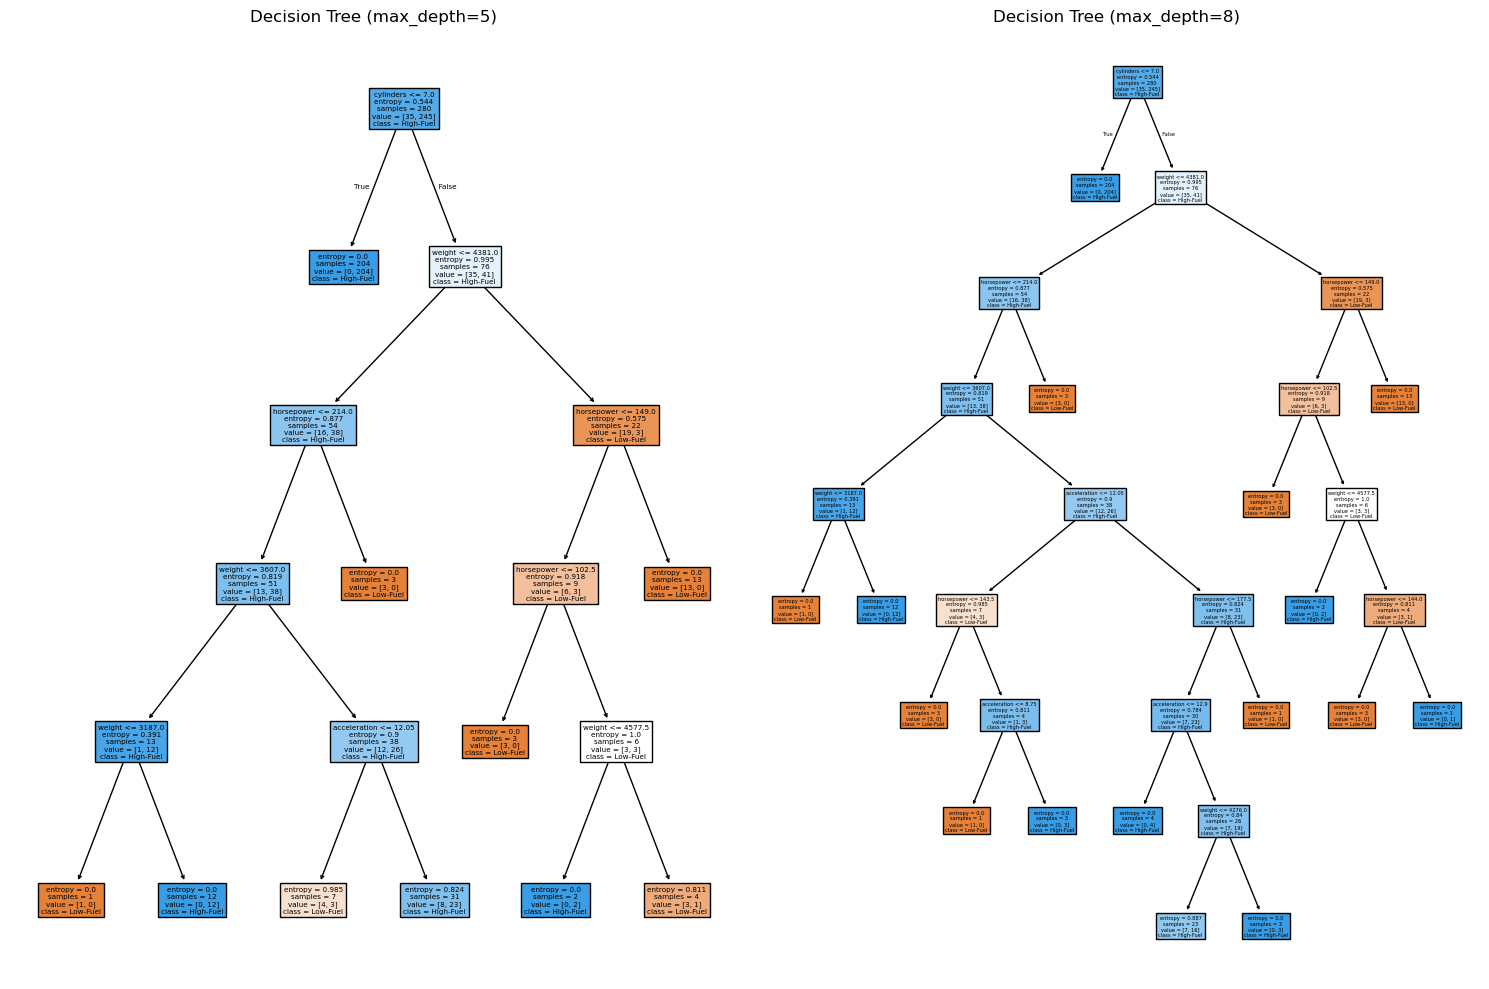

In [971]:
"""4.5) 5. Train decision trees, with max_depth set to 5, 8 respectively. Compare their results."""

# Initialize and train the Decision Tree model with max_depth=5
dt_model_depth_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model_depth_5.fit(X_train, y_train)

# Initialize and train the Decision Tree model with max_depth=8
dt_model_depth_8 = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
dt_model_depth_8.fit(X_train, y_train)

# Make predictions on the testing data for both models
y_pred_depth_5 = dt_model_depth_5.predict(X_test)
y_pred_depth_8 = dt_model_depth_8.predict(X_test)

# Calculate accuracy for both models
accuracy_depth_5 = accuracy_score(y_test, y_pred_depth_5)
accuracy_depth_8 = accuracy_score(y_test, y_pred_depth_8)

print(f"Accuracy of Decision Tree Model with max_depth=5: {accuracy_depth_5}")
print(f"Accuracy of Decision Tree Model with max_depth=8: {accuracy_depth_8}")

# Visualize both Decision Trees
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_tree(dt_model_depth_5, feature_names=X.columns, class_names=['Low-Fuel', 'High-Fuel'], filled=True)
plt.title("Decision Tree (max_depth=5)")

plt.subplot(1, 2, 2)
plot_tree(dt_model_depth_8, feature_names=X.columns, class_names=['Low-Fuel', 'High-Fuel'], filled=True)
plt.title("Decision Tree (max_depth=8)")

plt.tight_layout()
plt.show()

1. Model Complexity and Depth
Tree with max_depth=5: Simpler structure with fewer splits and fewer leaf nodes. This makes it computationally lighter and easier to store. Depth is constrained, limiting the ability to capture highly complex patterns in the data.

Tree with max_depth=8: More complex, with additional splits and a deeper structure. This allows it to model more intricate relationships in the dataset.
The increased depth leads to higher computational cost and storage requirements.

2. Interpretability
Tree with max_depth=5: Easier to interpret as it has fewer splits and nodes, can more readily understand and explain the decisions made by the model. Suitable for scenarios where simplicity and transparency are critical.

Tree with max_depth=8: More challenging to interpret due to its deeper and more complex structure. The increase in depth adds more variables and interactions, making it harder to fully grasp the logic of the decisions.

3. Risk of Overfitting
Tree with max_depth=5: Lower risk of overfitting because it stops splitting after a certain depth, which prevents it from capturing noise in the training data. Generalises better on unseen data due to its simplicity.

Tree with max_depth=8: Higher risk of overfitting because the additional splits might adapt too closely to the training data, including noise.
However, this risk is not evident, as the testing accuracy remains the same.

4. Prediction Accuracy
Both trees achieve the same accuracy of 89.26% on the testing dataset. This suggests that the additional complexity and depth in the tree with max_depth=8 did not improve performance, likely because the dataset patterns can be sufficiently captured by the simpler tree with max_depth=5.

The tree with max_depth=5 is preferable in this scenario. It is simpler, easier to interpret, and less likely to overfit while maintaining the same level of predictive accuracy.